## Project | Implementing Quantum Teleportation

Simulation of  the standard quantum teleportation protocol between Asja to Balvis.



### `Quantum_teleportation`

This class simulates a quantum system with three qubits. Asja has the qubits $q_2$ and $q_1$ and Balvis has the qubit $q_0$. 

### The methods

This Project has following methods, the state of $q_2$ is set to a random (real-valued) quantum state. 

1. `print_quantum_message()`: Print the initial quantum state of $ q_2 $.

1. `print_state()`: Print the state of system. 

3. `create_entanglement()`: Create entanglements between the qubits $q_1$ and $q_0$.

1. `balvis_travels()`: Assume that Balvis takes his qubits and go away.

1. `asja_measures()`: Asja measures her qubits $q_2$ and $q_1$ and return the measurement outcomes. Remark that the qubit $ q_0 $ is not measured. 

6. `asja_sends_measument_outcomes(outcome)`: Asja sends the measurement outcomes to Balvis such as `10`.

1. `balvis_post_processing()`: Apply post-processing quantum operators to Balvis’ qubit (if necessary) depending on the measurement outcomes recivied from Asja.



In [16]:
# import qiskit library and printing the version
import qiskit
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.16.3', 'qiskit-aer': '0.7.3', 'qiskit-ignis': '0.5.1', 'qiskit-ibmq-provider': '0.11.1', 'qiskit-aqua': '0.8.1', 'qiskit': '0.23.4'}


In [17]:
#importing necessary libraries for the project
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from random import randrange  

In [19]:
# quantum circuit with three qubits and three bits
q =  QuantumRegister(3,"q") 
c1 = ClassicalRegister(1,"c1") 
c2 = ClassicalRegister(1,"c2") 
qc = QuantumCircuit(q,c1,c2)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("Printing the quantum message")
print("a=",round(a,3),"b=",round(b,3))
print("a*a=",round(a**2,3),"b*b=",round(b**2,3))
qc.ry(2*theta,q[2])

the picked angle is 169.20000000000002 degrees and 2.9530970943744053 radians
Printing the quantum message
a= -0.982 b= 0.187
a*a= 0.965 b*b= 0.035


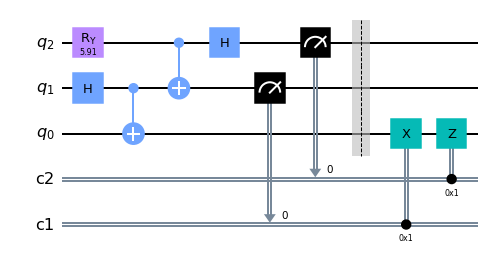

Printing the state vector is
0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.9822872507286885
0.187381314585725



In [20]:
# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

# the measurement done by Asja
qc.measure(q[2],c2)
qc.measure(q[1],c1)

qc.barrier()

# post-processing done by Balvis
qc.x(q[0]).c_if(c1,1)
qc.z(q[0]).c_if(c2,1)

# draw thw circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc)

print("Printing the state vector is")
for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()


In [21]:
classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])
        classical_outcome = classical_outcomes[i]
        balvis_state = [ current_quantum_state[2*i].real,current_quantum_state[2*i+1].real ]
print()
        
readable_quantum_state = "|"+classical_outcome+">"
readable_quantum_state += "("+str(round(balvis_state[0],3))+"|0>+"+str(round(balvis_state[1],3))+"|1>)"
print("the new quantum state is",readable_quantum_state)


all_states = ['000','001','010','011','100','101','110','111']

        
balvis_state_str = "|"+classical_outcome+">("
for i in range(len(current_quantum_state)):
    if abs(current_quantum_state[i].real-a)<0.000001: 
        balvis_state_str += "+a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+a)<0.000001:
        balvis_state_str += "-a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real-b)<0.000001: 
        balvis_state_str += "+b|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+b)<0.000001: 
        balvis_state_str += "-b|"+ all_states[i][2]+">"
balvis_state_str += ")"        
print("the new quantum state is",balvis_state_str)

the classical outcome is 11

the new quantum state is |11>(-0.982|0>+0.187|1>)
the new quantum state is |11>(+a|0>+b|1>)
